In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3

'%.3f'

# 代表的な連続型確率分布

In [2]:
# 確率分布の性質を確認しやすくするための関数の定義
linestyles = ['-', '--', ':']


# 期待値を求める
def E(X, g=lambda x: x):
    x_range, f = X

    def integrand(x):
        return g(x) * f(x)

    return integrate.quad(integrand, -np.inf, np.inf)[0]


# 分散を求める
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)

    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)

    return integrate.quad(integrand, -np.inf, np.inf)[0]


# 確率変数を引数に、その確率変数が確率の性質を満たしているか確認し、期待値と分散を計算して返す
def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, '密度関数が負の値をとります'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'確率の和が {prob_sum} になりました'
    print(f'期待値は {E(X):.3f}')
    print(f'分散は{V(X):.3f}')


# 確率変数と区間を引数に、その確率変数の密度関数と分布関数を図示する
def plot_prob(X, x_min, x_max):
    x_range, f = X

    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs], label='f(x', color='gray')
    ax.plot(xs, [F(x) for x in xs], label='F(x)', ls='--', color='gray')

    ax.legend()
    plt.show()

## 正規分布（normal distribution)
- 統計解析においてもっともよく使われ、もっとも重要といえる確率分布
- 自然界の多くの減少を表現できる確率分布
- ガウス分布（Gaussian distribution）という別名がある

とりうる値: 実数全体
Parameters: μ, σ**2
※そのまま正規分布の平均と分散になる
※　μ は実数、σ は正の実数である必要あがある

###### 重要な性質
正規分布に従う確率変数を変換しても、その確率分布もまた正規分布に従う

##### 標準正規分布（standard normal distribution）
- 標準化した正規分布 N(0, 1) のこと
- 正規分布の性質から X ~ N(μ, σ**2) を標準化した確率変数 Z = (X - μ)/σ は N(0, 1) に従うことを導き出せる
- 標準正規分布の性質さえよく知っていれば、どんな Parameters の正規分布を扱う場合でも標準化するだけで扱いやすい問題に帰着できる。

In [3]:
# NumPy での正規分布の実装
def N(mu, sigma):
    x_range = [-np.inf, np.inf]

    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma ** 2) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

    return x_range, f

In [4]:
# N(2, 0.5**2) に従う確率変数 X を作成する
mu, sigma = 2, 0.5
X = N(mu, sigma)

In [5]:
# N(2, 0.5**2) の 期待値と分散を計算する
check_prob(X)

期待値は 2.000
分散は0.250


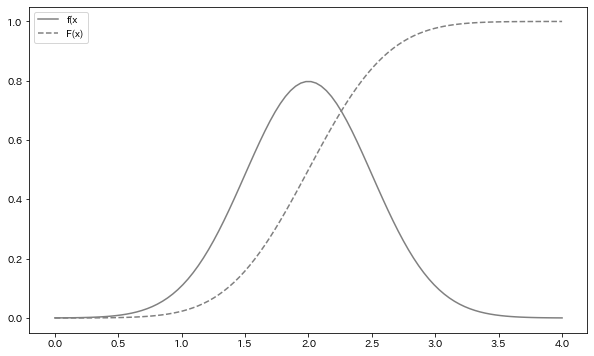

In [6]:
# N(2, 0.5**2) に従う確率変数 X の密度関数と分布関数を０から４の区間で図示してみる
plot_prob(X, 0, 4)

正規分布の密度関数は左右対称の釣鐘型になることが特徴

In [7]:
# scipy.stats を使って正規分布を実装
rv = stats.norm(2, 0.5)

In [8]:
# 期待値と分散
rv.mean(), rv.var()

(2.000, 0.250)

In [9]:
# 密度関数（Probability Density Function）
rv.pdf(2)

0.798

In [10]:
# 分布関数（Cumulative Distribution Function）
rv.cdf(1.7)

0.274

In [11]:
# 上側100%点を求める
rv.isf(0.3)

2.262

In [12]:
# 90% 区間をも求める
rv.interval(0.9)

(1.178, 2.822)

In [13]:
# 左右５％ずつ余っているので a, bは、次のように求めることもできる
rv.isf(0.95), rv.isf(0.05)

(1.178, 2.822)

In [14]:
# 右と左に5%ずつ余っているので、a, b は次のように求めることができる
rv.isf(0.95), rv.isf(0.05)

(1.178, 2.822)

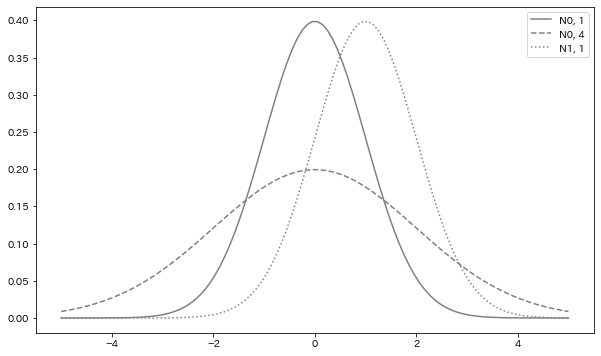

In [15]:
# stats.norm を使って、Parameter によって正規分布がどのように変化するか確認する。
# N(0, 1), N(0, 4), N(1, 1)の３つの正規分布を図示する。
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs), label=f'N{mu}, {sigma ** 2}', ls=ls, color='gray')
ax.legend()

plt.show()

- σ**2 が大きくなることで分布が広がる。
- μ の変化で分布全体が並行移動する

| 項目          | 値                                                   |
|-------------|-----------------------------------------------------|
| Params      | μ, σ                                                |
| とりうる値       | 実数全体                                                |
| 密度関数(PDF)   | 1 / np.sqrt(2*np.pi*σ) * np.exp(-(x-μ)**2 / 2*σ**2} |
| 期待値         | μ                                                   |
| 分散          | σ**2                                                |
| scipy.stats | norm(μ, σ)                                          |

## 指数分布（exponential distribution)
ある事象が発生する間隔（時間)が従う分布
- とりうる値: ０以上の実数
- Param: λ で正の実数

単位時間あたり平均λ回発生する事象の発生間隔が従う確率分布

###### 例
- １日あたり平均２件の交通事故が発生する地域における１日の交通事故の発生間隔
- １時間あたり平均 10access ある Site への access間隔

指数分布はポアソン分布との関わりが強い。
単位時間あたり平均 λ 回発生する Event に対して
- 単位時間あたりに Event が発生する回数が従うのが Poi(λ)
- 単位時間あたりに Event が発生する間隔が従うのが Ex(λ)

In [18]:
# NumPyで指数分布(exponential distribution）を実装する
def Ex(lam):
    x_range = [0, np.inf]

    def f(x):
        if x >= 0:
            return lam * np.exp(-lam * x)
        else:
            return 0

    return x_range, f

In [19]:
# # Ex(3) に従う確率変数 X を作成してみる
lam = 3
X = Ex(lam)

In [20]:
# 期待と分散の確認
check_prob(X)

期待値は 0.333
分散は0.111


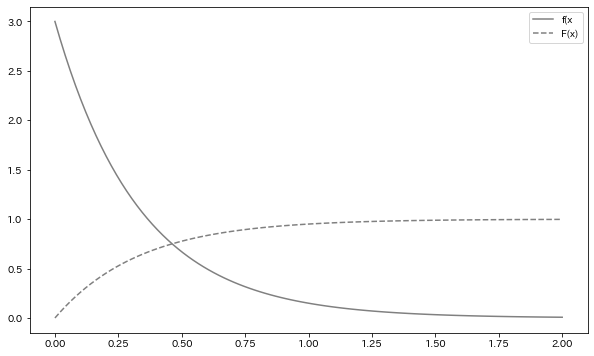

In [22]:
# 密度関数と分布関数を０から２の区間で図示してみる
plot_prob(X, 0, 2)

指数分布の密度関数は値が大きくなるにつれ指数的に減少していく

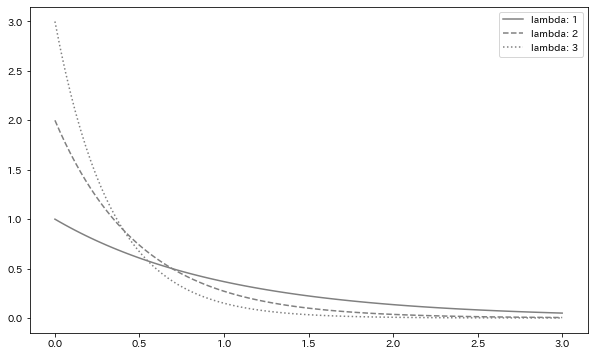

In [23]:
# scipy.stats の expon()関数を利用し、Param: λ を1, 2, 3 で変化させて分布の形状がどう変わるか図示してみる
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 3, 100)
for lam, ls in zip([1, 2, 3], linestyles):
    rv = stats.expon(scale=1 / lam)
    ax.plot(xs, rv.pdf(xs), label=f'lambda: {lam}', ls=ls, color='gray')
ax.legend()
plt.show()

Pram が何であろうと値が大きくなるにつれて確率密度は減少していくことがわかる

#### 指数分布（exponential distribution) のまとめ

項目 | 値
--- | ---
Pram | λ
とりうる値 | 正の実数
密度関数(PDF) | λ*exp(-λ*x)
期待値 | 1/λ
分散 | 1/λ**2
scipy.stats | expon(scale=1/λ)